<a href="https://colab.research.google.com/github/rkrymer/rkrymer.github.io/blob/master/flight_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Data Visualization

The goal of this portfolio project is to demonstrate my skills with the Python data visualization libraries [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) by performing exploratory data analysis on a set of mock flight data. The data was acquired through a Codecademy data science [course](https://join.codecademy.com/learn/paths/data-analyst-b/) and is meant only for educational/demonstration purposes.

The data set includes the following info for a set of nearly 130,000 flights from a fictional airline:
- `miles`: number of miles traveled by the flight
- `passengers`: number of passengers on the flight
- `delay`: departure delay in minutes
- `inflight_meal`: is a meal included in ticket price? (Yes/No)
- `inflight_entertainment`: is an entertainment system included in ticket price? (Yes/No)
- `inflight_wifi`: is WiFi included in ticket price? (Yes/No)
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend? (Yes/No)
- `coach_price`: average price paid for a coach ticket
- `firstclass_price`: average price paid for a first-class ticket
- `hours`: number of hours the flight took
- `redeye`: was this flight a redeye (overnight)? (Yes/No)

In [ ]:
# Install s3fs library to access data stored in AWS S3 bucket
%%capture
%pip install s3fs

In [ ]:
# Import Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import s3fs

In [ ]:
# Import flight data from S3
flight_data = pd.read_csv('s3://rk-dev-portfolio/flight.csv',
                   storage_options={"anon": True})

# Change data type for day_of_week to be categorical and ordered
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flight_data['day_of_week'] = pd.Categorical(flight_data['day_of_week'], categories=ordered_days, ordered=True)

flight_data.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


## Univariate Analysis

#### **Coach ticket price**

Average coach ticket price is about \$380, but prices vary widely, from as low as \$45 to nearly \$600.

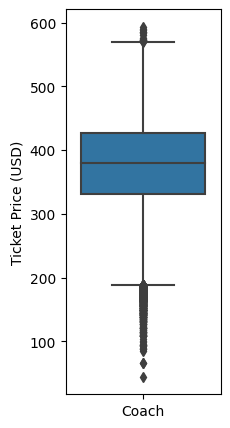


--- Coach Prices ---
Mean: $377
Median: $381
Minimum: $44
Maximum: $594



<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize data with box and whisker plot
plt.figure(figsize=(2,5))
ax = plt.subplot()
sns.boxplot(flight_data.coach_price)
plt.ylabel('Ticket Price (USD)')
ax.set_xticklabels(['Coach'])
plt.show()
plt.clf()

# Print summary statistics
print()
print('--- Coach Prices ---')
print('Mean: ${}'.format(round(flight_data.coach_price.mean())))
print('Median: ${}'.format(round(flight_data.coach_price.median())))
print('Minimum: ${}'.format(round(flight_data.coach_price.min())))
print('Maximum: ${}'.format(round(flight_data.coach_price.max())))
print()

#### **Flight delay distribution**
Flights frequently have delays of a few minutes, but very few flights have long delays (greater than 45 minutes).

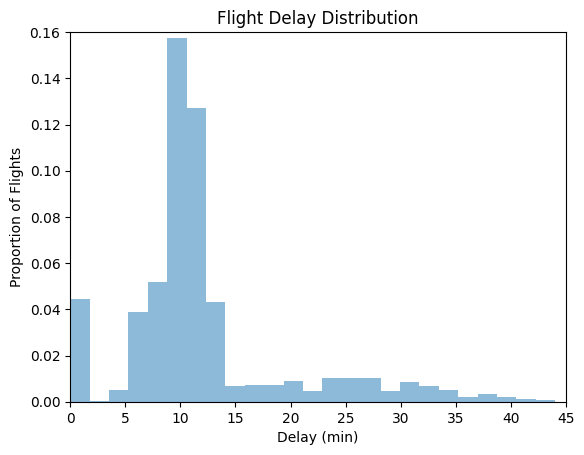


99.8% of flights leave within 45 minutes of their scheduled takeoff time.



<Figure size 640x480 with 0 Axes>

In [ ]:
# Truncate data to remove extreme outliers
delay_lt_45 = flight_data[flight_data.delay < 45]

# Visualize data using histogram
plt.hist(delay_lt_45.delay, bins=25, density=True, alpha=0.5)
plt.title('Flight Delay Distribution')
plt.xlabel('Delay (min)')
plt.ylabel('Proportion of Flights')
plt.axis([0,45,0,.16])
plt.show()
plt.clf()

# Calculate percentage of flights with relatively short delays
pct_lt_45 = round(len(delay_lt_45)/len(flight_data) * 100, 1)
print()
print('{}% of flights leave within 45 minutes of their scheduled takeoff time.'.format(pct_lt_45))
print()

## Bivariate Analysis

#### **Coach vs First-Class ticket price**
As would be expected, coach ticket price is positively correlated with first-class ticket price. But unexpectedly the data appears in two distinct clumps. Further analysis is necessary to determine the cause.

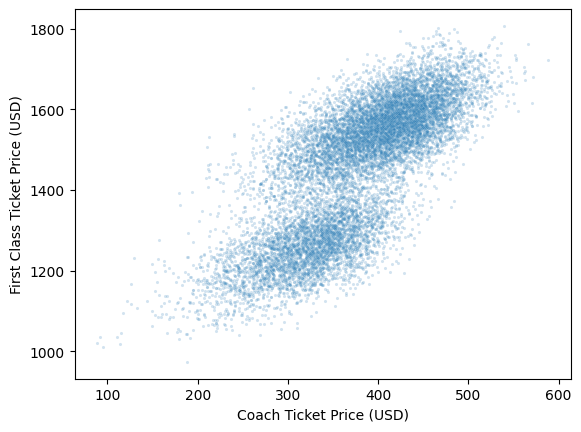

<Figure size 640x480 with 0 Axes>

In [ ]:
# Use randomized subset of data to reduce point density
data_subset = flight_data.sample(frac=0.1)

# Visualize data using scatter plot
sns.scatterplot(data=data_subset, x='coach_price', y='firstclass_price', s=5, alpha=0.2)
plt.xlabel('Coach Ticket Price (USD)')
plt.ylabel('First Class Ticket Price (USD)')
plt.show()
plt.clf()

#### **In-flight amenities vs Coach ticket prices**
Each of the three amenities is correlated with an increase in average coach ticket price. WiFi appears to have the largest effect on ticket price, while in-flight meal appears to have a relatively small effect on ticket price.

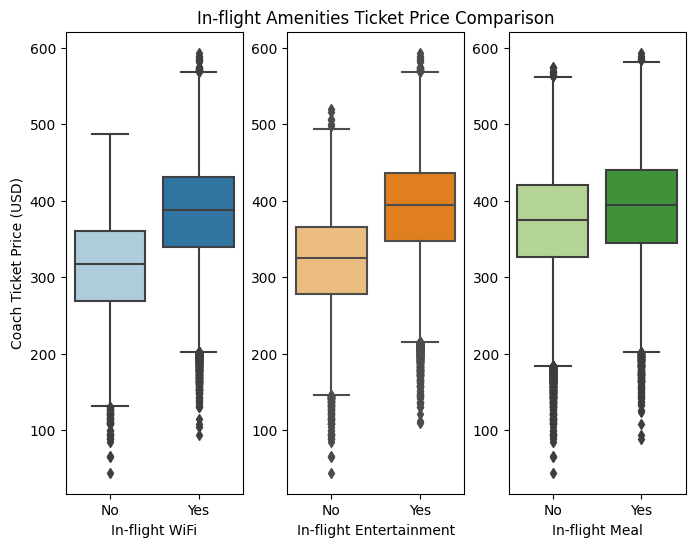

<Figure size 640x480 with 0 Axes>

In [ ]:
# Save alternate color palette for easy access
palette = sns.color_palette('Paired')

# Visualize data using side-by-side box plots
plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
sns.boxplot(data=flight_data.sort_values('inflight_wifi'), x='inflight_wifi', y='coach_price', palette=palette)
plt.xlabel('In-flight WiFi')
plt.ylabel('Coach Ticket Price (USD)')
plt.subplot(1,3,2)
sns.boxplot(data=flight_data.sort_values('inflight_entertainment'), x='inflight_entertainment', y='coach_price', palette=palette[6:])
plt.xlabel('In-flight Entertainment')
plt.ylabel('')
plt.title('In-flight Amenities Ticket Price Comparison')
plt.subplot(1,3,3)
sns.boxplot(data=flight_data.sort_values('inflight_meal'), x='inflight_meal', y='coach_price', palette=palette[2:])
plt.xlabel('In-flight Meal')
plt.ylabel('')
plt.subplots_adjust(wspace=0.25)
plt.show()
plt.clf()

#### **Number of passengers vs Flight length**

The average number of passengers on a flight is very similar regardless of flight length, varying by only 1-2 passengers. At least the color palette looks nice, even if the data is not very interesting!

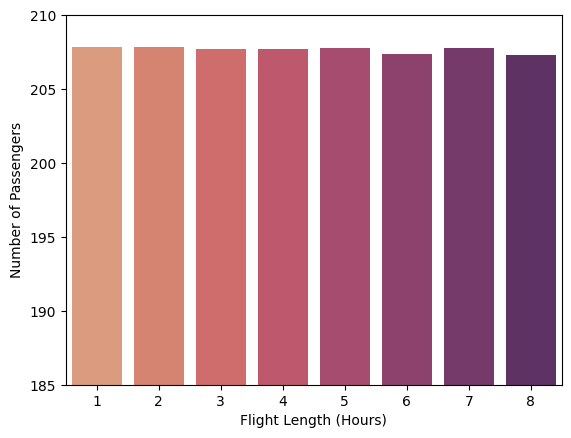

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize data using a bar graph
ax = plt.subplot()
sns.barplot(flight_data, y='passengers', x='hours', palette='flare', errorbar=None)
ax.set(ylim=(185, 210))
plt.xlabel('Flight Length (Hours)')
plt.ylabel('Number of Passengers')
plt.show()
plt.clf()

#### **Ticket price difference vs Flight length**

The longer a flight is, the greater the difference in average cost between a coach ticket and a first-class ticket, though the total range of the price difference is less than $100. Ticket price difference also seems to vary more widely for longer flights than it does for short flights.

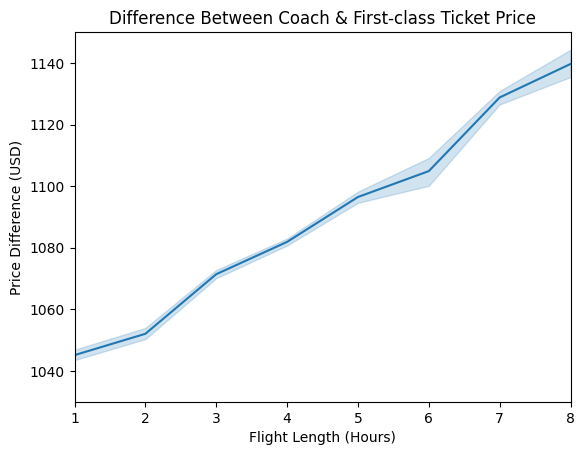

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate difference between coach and first-class ticket price
flight_data['price_diff'] = flight_data.firstclass_price - flight_data.coach_price

# Visualize data using a line plot
sns.lineplot(flight_data, x='hours', y='price_diff')
plt.xlabel('Flight Length (Hours)')
plt.ylabel('Price Difference (USD)')
plt.title('Difference Between Coach & First-class Ticket Price')
plt.axis([1,8,1030,1150])
plt.show()
plt.clf()

## Multivariate Analysis

#### **Coach vs First-Class ticket price on Weekends vs Weekdays**
By plotting a third variable using different hues, I was able to determine that the two distinct clumps of ticket prices on the previously-generated scatter plot are weekend vs weekday flights. Mystery solved!

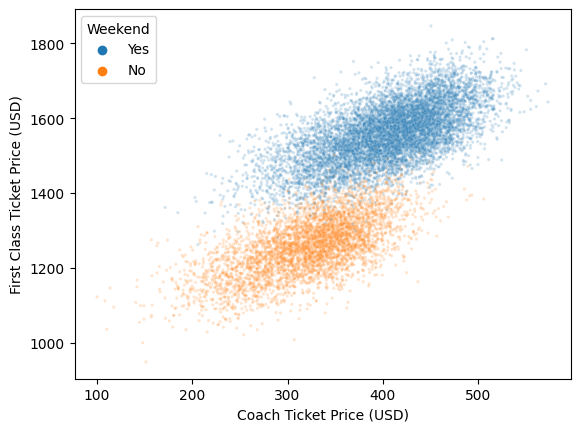

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize data using scatter plot with multiple hues
sns.scatterplot(data=data_subset, x='coach_price', y='firstclass_price', hue='weekend', s=5, alpha=0.2)
plt.xlabel('Coach Ticket Price (USD)')
plt.ylabel('First Class Ticket Price (USD)')
plt.legend(title='Weekend')
plt.show()
plt.clf()

#### **Coach ticket price on each day of the week, Daytime vs Red-eye flights**

Red-eye flights are consistently cheaper on average than daytime flights, regardless of the day of the week. Friday flights are similarly priced to weekend (Saturday/Sunday) flights. If Fridays were grouped with weekend flights instead of weekday flights in the scatter plot above, the two clumps of ticket prices would be even further apart!

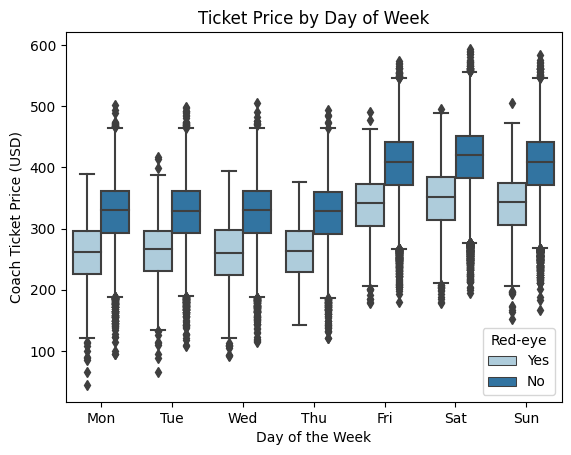

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize data using a series of side-by-side box plots
ax = plt.subplot()
sns.boxplot(flight_data, x='day_of_week', y='coach_price', hue='redeye', palette=palette)
plt.xlabel('Day of the Week')
plt.ylabel('Coach Ticket Price (USD)')
plt.legend(title='Red-eye')
plt.title('Ticket Price by Day of Week')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
plt.clf()